### Importing Libraries for analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Reading the .csv data file

df = pd.read_csv("Diwali Sales Data.csv", encoding="unicode_escape")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Checking for NULL's

In [8]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [9]:
# Dropping invalid columns 

df.drop(columns = ["Status", "unnamed1"], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


### Dropping Null Values

In [11]:
df.dropna(inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [13]:
# Converting Amount column to integer data type

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce').astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

### Renaming the column

In [11]:
df.rename(columns = {"Age Group": "Age_Group"}, inplace = True)
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Visualizing the data

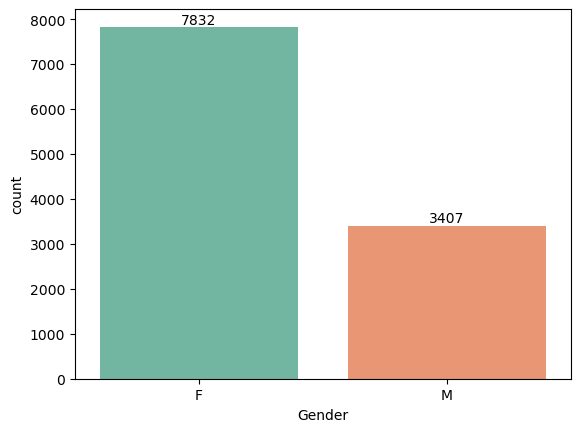

In [14]:
ax = sns.countplot(
    x='Gender',
    data=df,
    hue='Gender',
    palette='Set2',
    legend=False
)
for bars in ax.containers:
    ax.bar_label(bars)

### 💡 Insight

**Female customers** form the majority of the customer base and demonstrate **greater purchasing power** compared to male customers, making them the primary contributors to overall revenue.


In [15]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

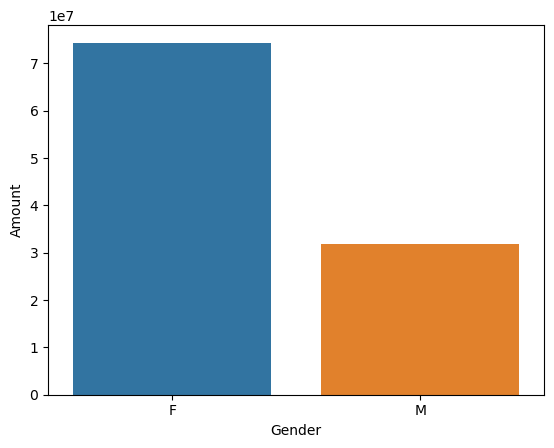

In [16]:
sales_gender = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(data = sales_gender, x = 'Gender', y = 'Amount', hue = 'Gender')

### 💡 Insight

**Female customers** show **greater purchasing power** compared to male customers.


<Axes: xlabel='Age_Group', ylabel='Amount'>

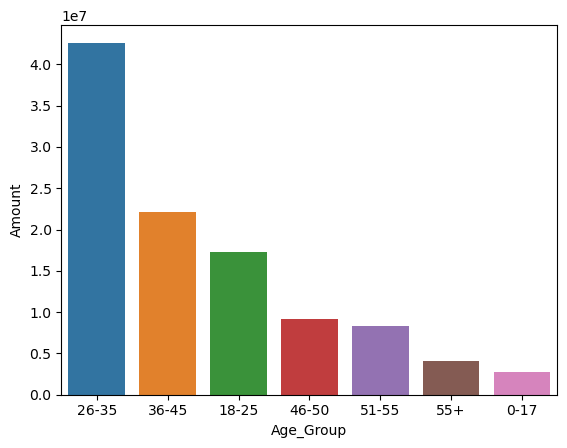

In [58]:
agegrp_amt = (
    df.groupby('Age_Group', as_index=False)['Amount']
      .sum()
      .sort_values(by='Amount', ascending=False)
)

sns.barplot(
    x='Age_Group',
    y='Amount',
    data = agegrp_amt,
    legend=False,
    hue = 'Age_Group'
)

### 💡 Insight

This graph shows that customers of Age Group **26-35** are major buyers.


<Axes: xlabel='Age_Group', ylabel='count'>

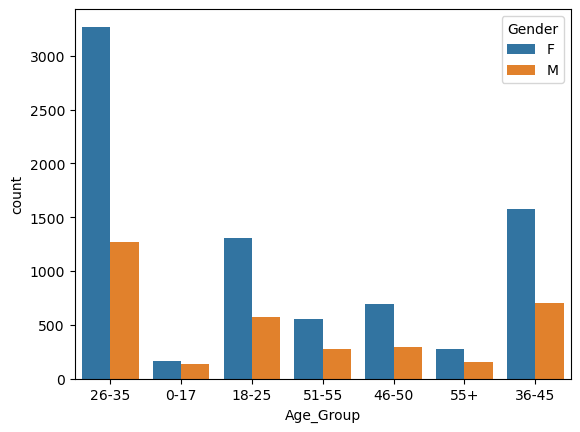

In [17]:
sns.countplot(data = df, x = 'Age_Group', hue = 'Gender')

### 💡 Insight

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.


<Axes: xlabel='State', ylabel='Amount'>

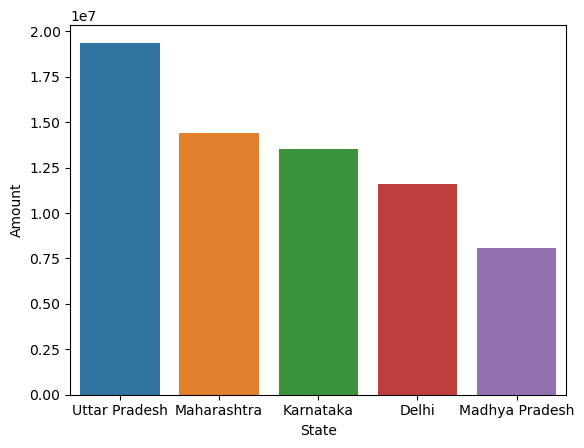

In [18]:
top_states = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head()
sns.barplot(x = 'State', y = 'Amount', data = top_states, hue = 'State')

<Axes: xlabel='State', ylabel='Orders'>

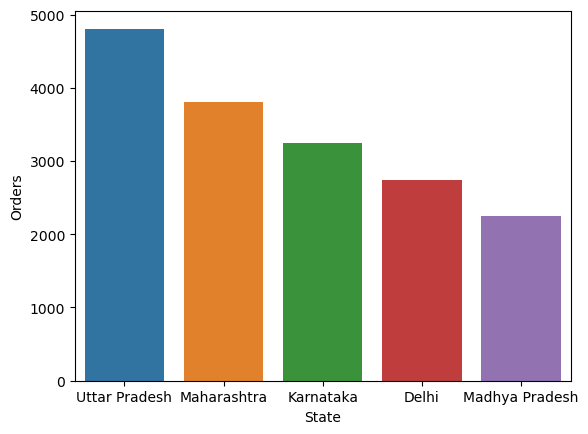

In [19]:
state_orders = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head()
sns.barplot(x = 'State', data = state_orders, y = 'Orders', hue = 'State')

### 💡 Insight

The above graph shows that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.


In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

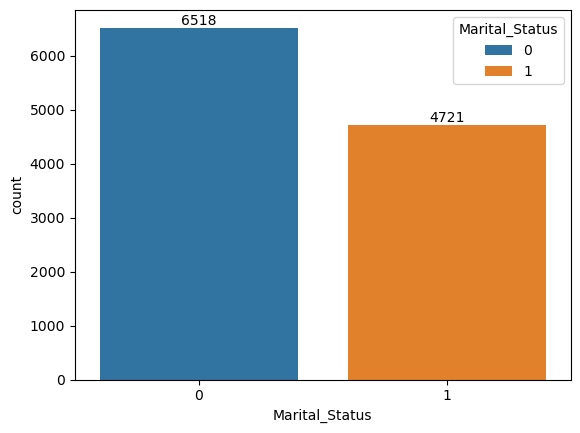

In [24]:
ms = sns.countplot(x = 'Marital_Status', data = df, hue = 'Marital_Status')
for bars in ms.containers:
    ms.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

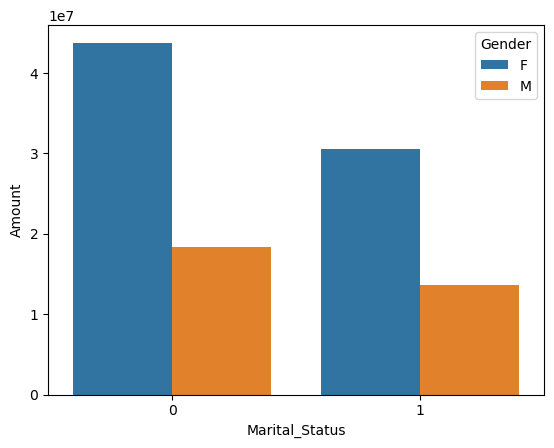

In [28]:
sales_gm = df.groupby(['Gender', 'Marital_Status'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Marital_Status', hue = 'Gender', y = 'Amount', data = sales_gm)

### 💡 Insight

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.

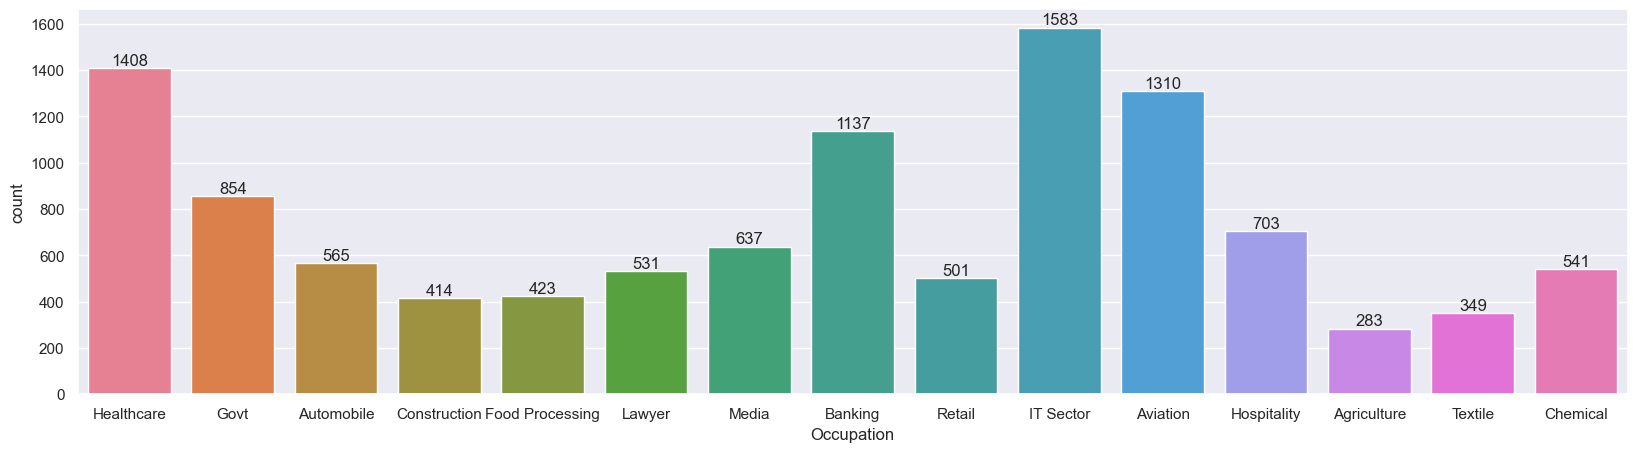

In [33]:
sns.set(rc = {'figure.figsize': (20,5)})
occ = sns.countplot(x = 'Occupation', data = df, hue = 'Occupation')

for bars in occ.containers:
    occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

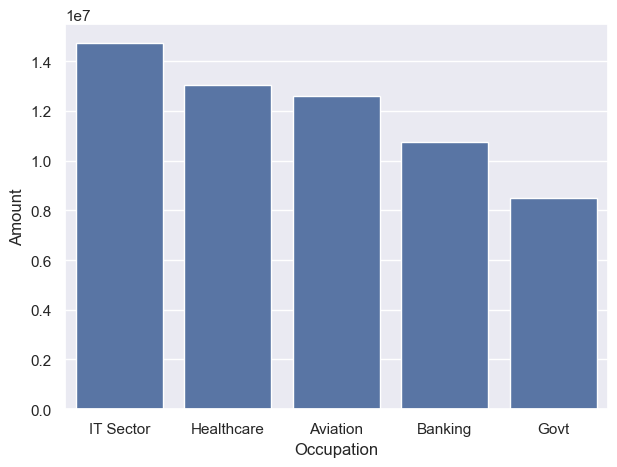

In [36]:
sales_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head()
sns.set(rc = {'figure.figsize': (7,5)})
sns.barplot(x = 'Occupation',  y = 'Amount', data = sales_occ)

### 💡 Insight

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

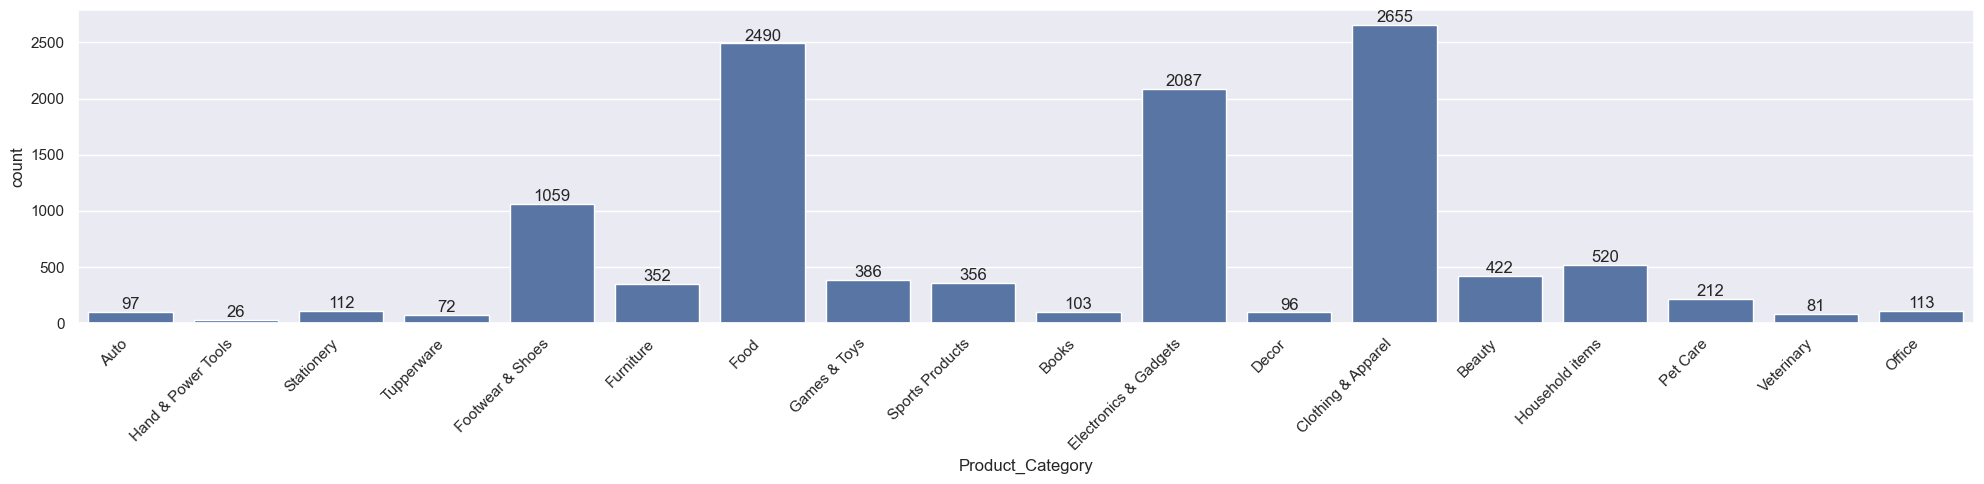

In [39]:
sns.set(rc = {'figure.figsize': (20,5)})
pc = sns.countplot(x = 'Product_Category', data = df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bars in pc.containers:
    pc.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

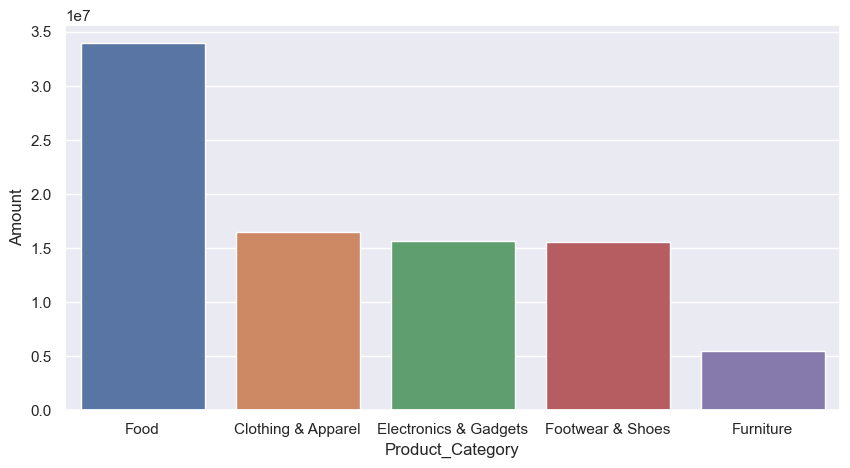

In [42]:
sales_pc = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head()
sns.set(rc = {'figure.figsize': (10,5)})
sns.barplot(x = 'Product_Category',  y = 'Amount', data = sales_pc, hue = 'Product_Category')

### 💡 Insight

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.

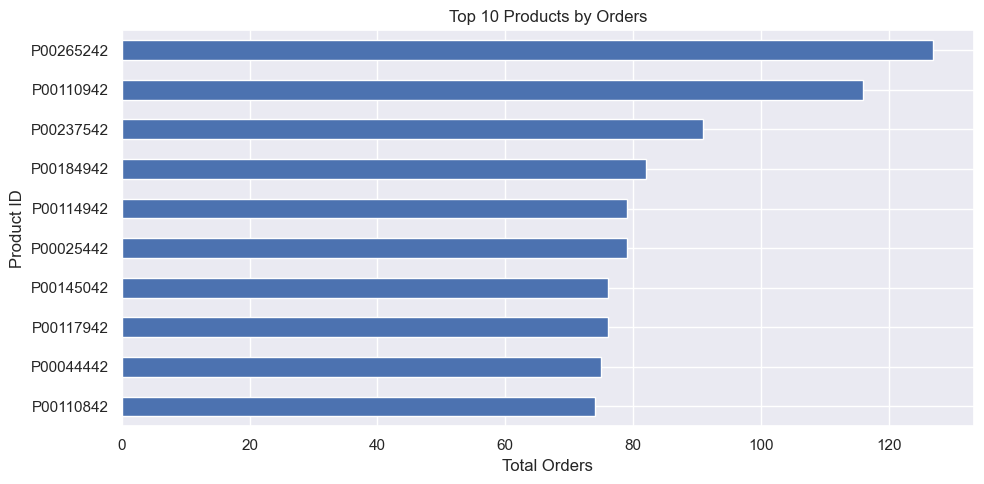

In [48]:
top10 = (
    df.groupby('Product_ID')['Orders']
      .sum()
      .nlargest(10)
      .sort_values()
)

top10.plot(
    kind='barh',
    figsize=(10,5),
    title='Top 10 Products by Orders'
)

plt.xlabel('Total Orders')
plt.ylabel('Product ID')
plt.tight_layout()

### 💡 Insight

From above graph we see that the most ordered ProductID's are P00265242, P00110942 and P00237542

## Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.